In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

## Rotten Tomatoes Review Datasets

In [2]:
# limited the data to nrows reviews for testing purposes
df = pd.read_csv('./datasets/rotten_tomatoes_reviews.csv', nrows=25000)
print(df)

       Freshness                                             Review
0              1   Manakamana doesn't answer any questions, yet ...
1              1   Wilfully offensive and powered by a chest-thu...
2              0   It would be difficult to imagine material mor...
3              0   Despite the gusto its star brings to the role...
4              0   If there was a good idea at the core of this ...
...          ...                                                ...
24995          1   "Coco" is full of life, especially when we're...
24996          1   Decent action and some surprises result in an...
24997          1   Vague on details regarding the company or the...
24998          0   Somnambulistic from start to finish, it's a f...
24999          0   with half of the Hughes Brothers, you end up ...

[25000 rows x 2 columns]


In [3]:
tomatoReviews = df['Review']
tomatoLabels = df['Freshness']

## Video Game Review Datasets

In [4]:
game_data = pd.read_csv('./datasets/metacritic_critic_reviews.csv', sep = ",", encoding="utf-8")
game_data = game_data.drop(columns = ['name', 'game', 'platform', 'date'])
game_data = game_data[['score', 'review']]
game_data= game_data.rename(columns={"score": "Sentiment", "review": "Review"})
for index in game_data.index:
    if game_data.loc[index,'Sentiment'] >=89:
        game_data.at[index,'Sentiment']= 1
    elif game_data.loc[index,'Sentiment'] <=75:
        game_data.at[index,'Sentiment']= 0
game_data['Source'] = 'Video Games'
game_data = game_data.drop(game_data[game_data.Sentiment > 1].index)
game_data = game_data[:17000]

## Goodread book Reviews Datasets

In [5]:
def preprocess_goodread(fileName):
    scoreList = list()
    textList = list()

    # put individual categories into lists
    with open(fileName, 'r', encoding='ISO-8859-1') as file:
        for line in file:
            if 'rating: ' in line and line.split(":")[0] == "rating":
                scoreList.append(float(line.split(":")[1]))
            if 'review_text: ' in line:
                textList.append(line[12:]) #remove 'review/text' in front of all lines"
            else:
                continue
    return scoreList, textList

In [6]:
bookScoreList, bookTextList = preprocess_goodread("./datasets/Goodread_book_reviews.txt")

## Amazon Movies Reviews Datasets

In [7]:
def preprocess_amazon(fileName):
    helpList = list()
    scoreList = list()
    textList = list()

    # put individual categories into lists
    with open(fileName, 'r', encoding='ISO-8859-1') as file:
        for line in file:
            if 'review/helpfulness:' in line:
                try:
                    helpList.append(eval(line.split()[1]))
                except ZeroDivisionError:
                    helpList.append(0)
            if 'review/score:' in line:
                scoreList.append(float(line.split()[1]))
            if 'review/text:' in line:
                textList.append(line[12:]) #remove 'review/text' in front of all lines"
            else:
                continue

    return helpList, scoreList, textList

In [8]:
helpList, scoreList, textList = preprocess_amazon("./datasets/Amazon_movies.txt")

In [9]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
nltkWords = set(stopwords.words('english'))

In [10]:
"""
Since the other datasets sentiments are in either psitive or negative, 
It would be better to classify Amazon/Goodreads reviews originally in 5 star ratings 
to boolean rating (0,1) where zero implies negative reviews and is mapped 
to 1 and 2 star rating, 1 implies positive reviews and is mapped to
4 and 5 ratings and 3 is mapped neutral and is removed from the datasets
"""

def restructure_sentiment(textList, scoreList):
    amaReviews = []
    amaSentiment = []

    for reviews, sentiment in zip(textList, scoreList):
        if sentiment in (1.0, 2.0):
            amaSentiment.append(0)
            amaReviews.append(reviews)
        elif sentiment in (4.0, 5.0):
            amaSentiment.append(1)
            amaReviews.append(reviews)
        else:
            continue
    return amaReviews, amaSentiment

In [11]:
amaReviews, amaSentiment = restructure_sentiment(textList, scoreList)

In [12]:
bookReviews, bookSentiment = restructure_sentiment(bookTextList, bookScoreList)

In [13]:
# Data Visualization
data = pd.DataFrame(tomatoLabels.values, columns=['Sentiment'])
data['Review'] = tomatoReviews
data['Source'] = 'Rotten Tomatoes'

data.head(10)

,Sentiment,Review,Source
0,1,"Manakamana doesn't answer any questions, yet ...",Rotten Tomatoes
1,1,Wilfully offensive and powered by a chest-thu...,Rotten Tomatoes
2,0,It would be difficult to imagine material mor...,Rotten Tomatoes
3,0,Despite the gusto its star brings to the role...,Rotten Tomatoes
4,0,If there was a good idea at the core of this ...,Rotten Tomatoes
5,0,"Gleeson goes the Hallmark Channel route, dama...",Rotten Tomatoes
6,1,It was the height of satire in 1976: dark as ...,Rotten Tomatoes
7,0,"Everyone in ""The Comedian"" deserves a better ...",Rotten Tomatoes
8,0,Actor encourages grumpy Christians to embrace...,Rotten Tomatoes
9,1,"Slight, contained, but ineffably soulful.",Rotten Tomatoes


In [14]:
# Add Amazon sentiments, Reviews and source
amaData = pd.DataFrame(amaSentiment, columns=['Sentiment'])
amaData['Review'] = amaReviews
amaData['Source'] = 'Amazon Movie'

data = data.append(amaData, ignore_index=True)
data.tail(10)

,Sentiment,Review,Source
47484,1,"For those of you not in the business, Triumph...",Amazon Movie
47485,1,"If you like time travel movies, an interestin...",Amazon Movie
47486,1,"I suppose if one could go back in time, this ...",Amazon Movie
47487,1,The Final Countdown makes for nearly 2 hours ...,Amazon Movie
47488,1,I'll echo the other reviews regarding the Blu...,Amazon Movie
47489,1,If you've got a good home theatre system you'...,Amazon Movie
47490,1,I received this verrrrry fast...the movie is ...,Amazon Movie
47491,0,"...shame on you. Fool me twice, shame on me. ...",Amazon Movie
47492,1,The seller promised a great movie and it inde...,Amazon Movie
47493,0,I really hope the copy I received was an exce...,Amazon Movie


In [15]:
# Add Goodread sentiments, Reviews and source
bookData = pd.DataFrame(bookSentiment, columns=['Sentiment'])
bookData['Review'] = bookReviews
bookData['Source'] = 'Goodread books'

data = data.append(bookData, ignore_index=True)
data.tail(10)

,Sentiment,Review,Source
66354,1,Author Cliff Ball draws on his considerable k...,Goodread books
66355,1,I got the set one Christmas when I was 7 or 8...,Goodread books
66356,1,"I loved the audiobook, Read by the author. He...",Goodread books
66357,0,I read this because I've read the earlier boo...,Goodread books
66358,0,"Not one of Grisham's best, the book is taking...",Goodread books
66359,0,"Save time and watch it on stage, where they l...",Goodread books
66360,1,I am addicted to these old guys! Love them\n,Goodread books
66361,1,"Hilarious, a fast bubble gum read!\n",Goodread books
66362,1,By Michelle Moran\n,Goodread books
66363,1,"Hard to follow, but my goal is to understand ...",Goodread books


In [16]:
# Add VideoGame Data

data = data.append(game_data, ignore_index = True)

In [17]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

In [18]:
data.Source.value_counts()

Rotten Tomatoes    25000
Amazon Movie       22494
Goodread books     18870
Video Games        17000
Name: Source, dtype: int64

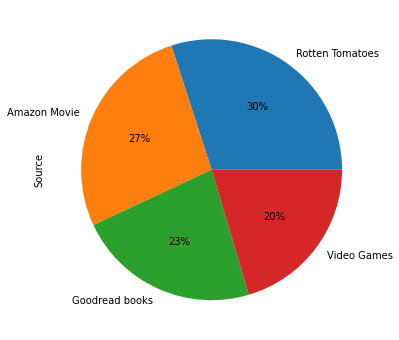

In [19]:
data.Source.value_counts().plot(kind='pie', autopct='%2.0f%%')
plt.show()

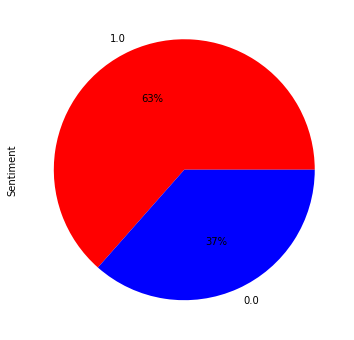

In [20]:
data.Sentiment.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=["red", "blue"])
plt.show()

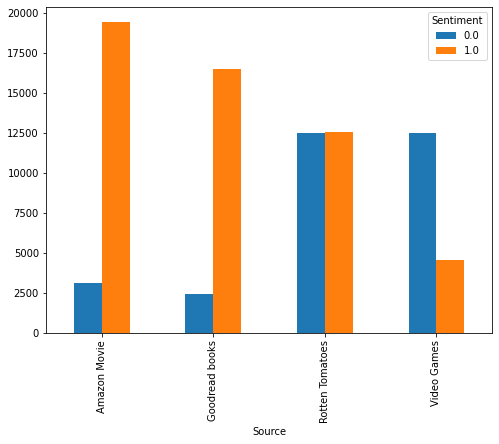

In [21]:
data_sentiment = data.groupby(['Source', 'Sentiment']).Sentiment.count().unstack()
data_sentiment.plot(kind='bar')
plt.show()

In [22]:
import sklearn.feature_extraction.text as text
def clean_data(textList):
    # the helpList and scoreList are already converted to lists, need to
    # preprocess the text into some thing that is inputtable to a model

    # Preprocess with Term Frequency-Inverse Document Frequency as opposed
    # to a BoW model (or some other text processing method)
    vectorizer = text.TfidfVectorizer(encoding='ISO-8859-1', min_df=7, 
                                      max_df=0.8, stop_words=nltkWords)
    
    # preprocessedText = vectorizer.fit_transform(textList).toarray()
    preprocessedText = vectorizer.fit_transform(textList)
    return preprocessedText

In [23]:
processedText = clean_data(data['Review'])
processedSentiments = data['Sentiment']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processedText, 
                                                    processedSentiments, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [27]:
print(textList[0])
print(X_train)

 Synopsis: On the daily trek from Juarez, Mexico to El Paso, Texas an ever increasing number of female workers are found raped and murdered in the surrounding desert. Investigative reporter Karina Danes (Minnie Driver) arrives from Los Angeles to pursue the story and angers both the local police and the factory owners who employee the undocumented aliens with her pointed questions and relentless quest for the truth.<br /><br />Her story goes nationwide when a young girl named Mariela (Ana Claudia Talancon) survives a vicious attack and walks out of the desert crediting the Blessed Virgin for her rescue. Her story is further enhanced when the "Wounds of Christ" (stigmata) appear in her palms. She also claims to have received a message of hope for the Virgin Mary and soon a fanatical movement forms around her to fight against the evil that holds such a stranglehold on the area.<br /><br />Critique: Possessing a lifelong fascination with such esoteric matters as Catholic mysticism, miracl

### Random Forest Classification

In [28]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [29]:
predictions = text_classifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[3998 2080]
 [1129 9466]]
              precision    recall  f1-score   support

         0.0       0.78      0.66      0.71      6078
         1.0       0.82      0.89      0.86     10595

    accuracy                           0.81     16673
   macro avg       0.80      0.78      0.78     16673
weighted avg       0.81      0.81      0.80     16673

0.8075331374077851


### Naive Bayes Model for review classification (MultinomialNB)

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nbModel = MultinomialNB(alpha=1.0, 
                        fit_prior=True, 
                        class_prior=None)

nbModel.fit(X_train, y_train)

print(nbModel.score(X_test, y_test))
print(nbModel.predict(X_test[0]))

0.803634618844839
[1.]


### Support Vector Machines for review classification (LinearSVC)

In [33]:
from sklearn.svm import LinearSVC

In [34]:
svcModel = LinearSVC(penalty='l2', 
                     loss='squared_hinge', 
                     dual=True, 
                     C=1.0)

svcModel.fit(X_train, y_train)

print(svcModel.score(X_test, y_test))

0.8311041804114436


### Neural Networks for review classification (MLPerceptron/MLPClassifier)

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
mlpModel = MLPClassifier(hidden_layer_sizes=(100, ), 
                         solver='adam', 
                         activation='relu', 
                         alpha=1e-4, 
                         batch_size='auto', 
                         learning_rate_init=1e-3)

mlpModel.fit(X_train, y_train)

print(mlpModel.score(X_test, y_test))

0.8222275535296587
